In [1]:
# Import scikit-plot
import scikitplot.seaborn as sp

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)  # reproducibility
import pandas as pd

from sklearn.datasets import (
    load_breast_cancer as data_2_classes,
    # load_iris as data_3_classes,
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
# X, y = data_3_classes(return_X_y=True, as_frame=False)
X, y = data_2_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)
np.unique(y)

array([0, 1])

In [4]:
# Create an instance of the LogisticRegression
model = (
    LogisticRegression(max_iter=int(1e5), random_state=0)
    .fit(X_train, y_train)
)
# Perform predictions
y_val_prob = model.predict_proba(X_val)
# Create a DataFrame with predictions
df = pd.DataFrame({
    "y_true": y_val==1,  # target class (0,1,2)
    "y_score": y_val_prob[:, 1],  # target class (0,1,2)
    # "y_true": np.random.normal(0.5, 0.1, 100).round(),
    # "y_score": np.random.normal(0.5, 0.15, 100),
    # "hue": np.random.normal(0.5, 0.4, 100).round(),
})

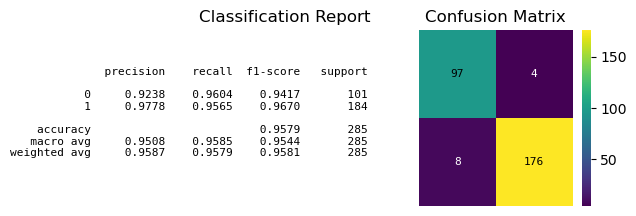

In [5]:
p = sp.evalplot(
    df,
    x="y_true",
    y="y_score",
    kind="all",
    allow_probs=True,
)

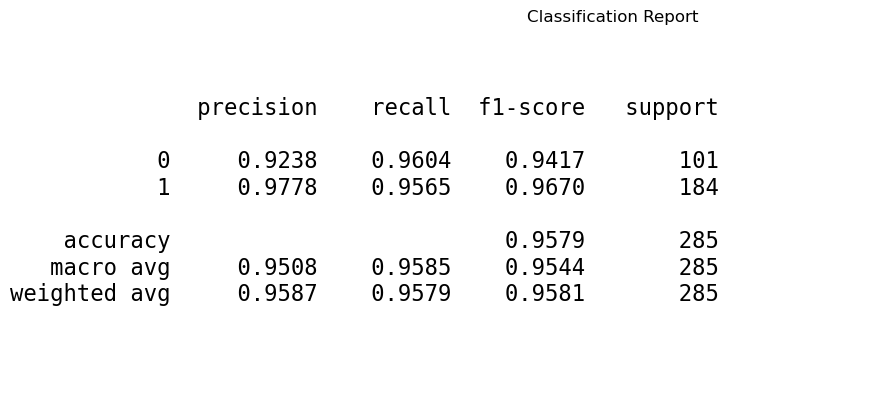

In [6]:
p = sp.evalplot(
    df,
    x="y_true",
    y="y_score",
    kind="classification_report",
    text_kws={'fontsize': 16},
    allow_probs=True,
)

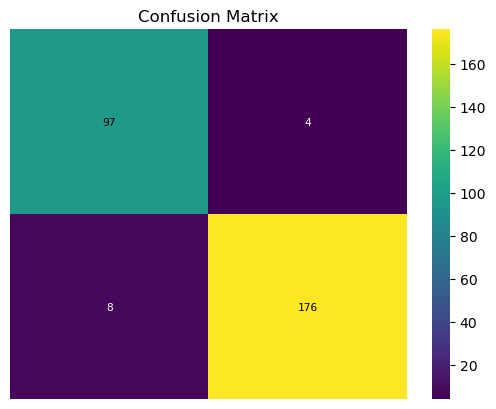

In [7]:
p = sp.evalplot(
    df,
    x="y_true",
    y="y_score",
    kind="confusion_matrix",
    allow_probs=True,
)

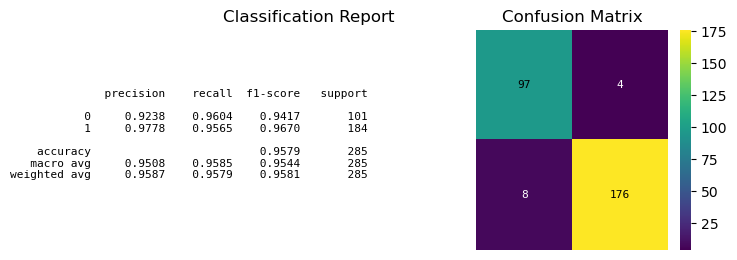

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
p = sp.evalplot(
    df,
    x="y_true",
    y="y_score",
    kind="all",
    # legend=True,
    allow_probs=True,
)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Create a synthetic dataset with 15 classes
X, y = make_classification(n_samples=5000, n_features=20, 
                           n_classes=15, n_informative=15, 
                           n_redundant=5, random_state=0)

# Convert to DataFrame for easier visualization (optional)
data = pd.DataFrame(X)
data['target'] = y

print(data.head())

          0         1         2         3         4         5         6  \
0 -3.249907 -7.609039  3.904290  0.313745  2.000599 -0.640410  2.559116   
1 -1.653727  3.553595 -0.281940  0.891329  2.596121 -1.900766 -0.999605   
2 -1.057158  7.627822  0.181669 -1.126439  1.519765 -0.150882 -2.444492   
3  0.734427 -2.012334 -1.798327  2.846008 -7.189982  0.913782  1.935652   
4  6.516446 -8.325342 -1.350152  3.295481 -4.392443  0.524291 -3.488377   

          7         8         9  ...        11        12        13        14  \
0 -0.676621 -7.130580  0.079088  ...  3.554686 -0.939359  1.895190 -1.378957   
1 -2.239182 -2.599864 -0.922087  ... -1.053954 -0.799019  0.595006 -3.083820   
2  1.663728  1.520805  1.112522  ... -6.813228 -2.121091 -0.027413 -3.438824   
3 -1.679383 -1.773499 -1.943775  ... -0.628516 -1.870703  4.420982  2.069587   
4 -4.560987 -4.070183  1.824780  ...  7.752507  1.495456 -1.295802 -2.942214   

         15        16        17        18         19  target  
0 -5.

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

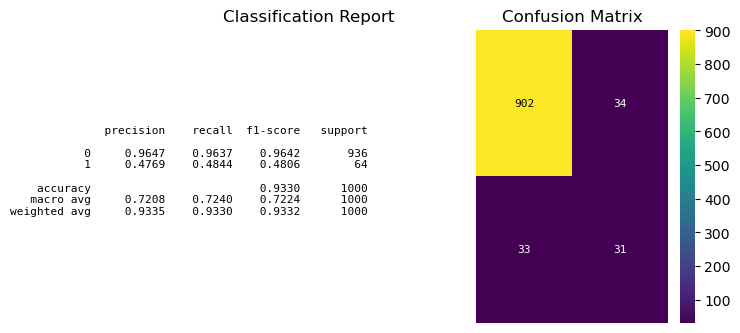

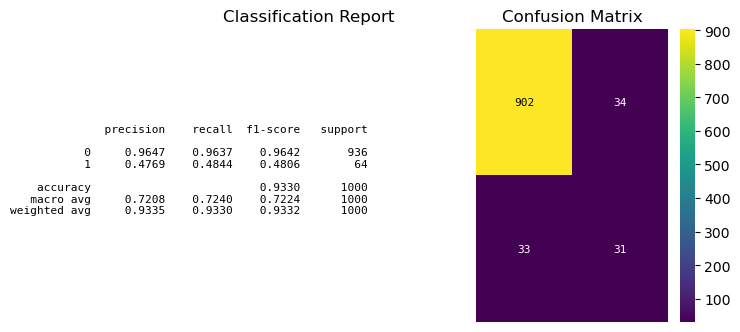

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax1 = sp.evalplot(
    x=y_test == 0,
    y=y_pred == 0,
    kind="all",
    # legend=True,
)
plt.show()
ax2 = sp.evalplot(
    x=y_test == 0,
    y=y_pred == 0,
    kind="all",
    **{'figsize': (6.8, 3.8)}
    # legend=True,
)

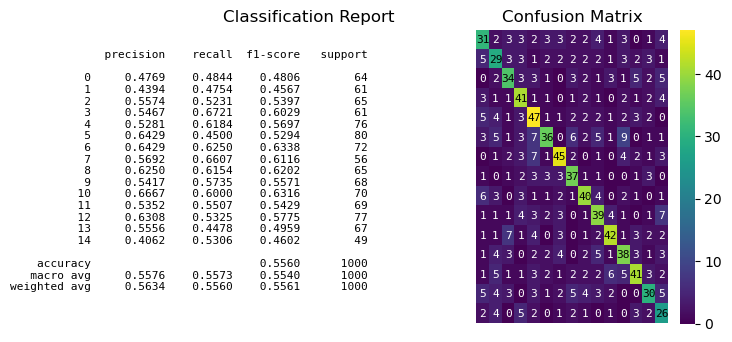

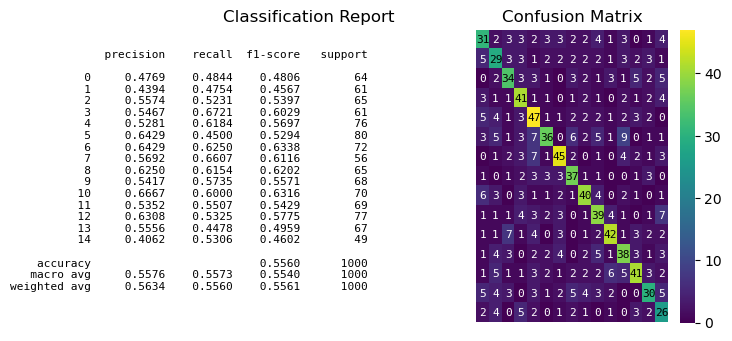

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax1 = sp.evalplot(
    x=y_test,
    y=y_pred,
    kind="all",
    # legend=True,
)
plt.show()
ax2 = sp.evalplot(
    x=y_test,
    y=y_pred,
    kind="all",
    **{'figsize': (6.8, 3.8)}
    # legend=True,
)

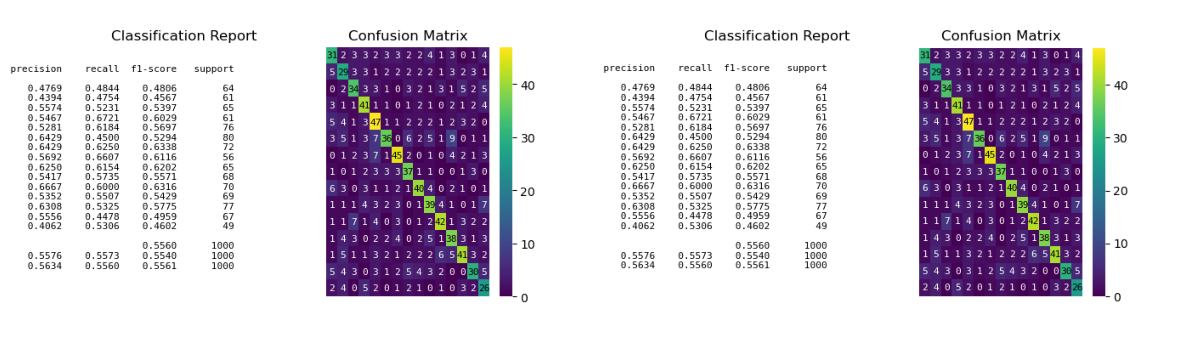

In [16]:
import scikitplot as sp

# Save the combined figure as an image file
figs = sp.stack(  # experimental 
    ax1.figure,
    ax2.figure,
    orient='x',
    **{'figsize': (12, 8)}
)

In [17]:
# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.48      0.48      0.48        64
           1       0.44      0.48      0.46        61
           2       0.56      0.52      0.54        65
           3       0.55      0.67      0.60        61
           4       0.53      0.62      0.57        76
           5       0.64      0.45      0.53        80
           6       0.64      0.62      0.63        72
           7       0.57      0.66      0.61        56
           8       0.62      0.62      0.62        65
           9       0.54      0.57      0.56        68
          10       0.67      0.60      0.63        70
          11       0.54      0.55      0.54        69
          12       0.63      0.53      0.58        77
          13       0.56      0.45      0.50        67
          14       0.41      0.53      0.46        49

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.55      1000
weighted avg       0.56   

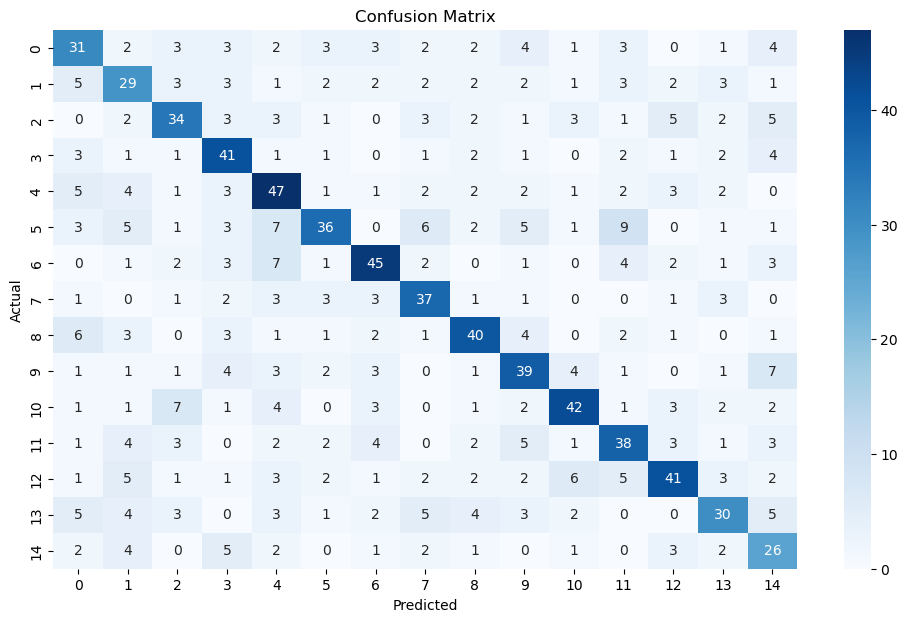

In [18]:
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(15), yticklabels=np.arange(15))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()